In [ ]:
#need to install sklearn package

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull,convex_hull_plot_2d

In [2]:
#king county boundaries
maxLat = 47.7763
minLat = 47.1878
maxLon = -121.0941
minLon = -122.5346

In [3]:
df = pd.read_csv("Downloads/carnivore-spotter-export3.csv")

In [4]:
cols = ['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Latitude', 'Longitude', 'Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs']
df.columns = cols

In [5]:
df['Time_Seen']=pd.to_datetime(df.Time_Seen).copy()

In [6]:
df['Month']=df.Time_Seen.dt.month

In [7]:
df['Year'] = df.Time_Seen.dt.year

In [8]:
df = df[(df['Latitude']>minLat)&(df['Latitude']<maxLat)&(df['Longitude']>minLon)&(df['Longitude']<maxLon)]

In [9]:
df = df.drop(['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Behavior','Time_Submitted',
       'Reaction_Desription', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs'],axis=1)
df.head()

,Time_Seen,Latitude,Longitude,Species,Month,Year
1,2019-08-06 13:15:00+00:00,47.683153,-122.127485,Coyote,8,2019
2,2019-09-09 13:30:00+00:00,47.603330,-122.210544,Cougar/Mountain Lion,9,2019
3,2019-08-01 16:45:00+00:00,47.676127,-122.328966,Coyote,8,2019
6,2019-09-19 14:45:00.501000+00:00,47.671392,-122.333005,Coyote,9,2019
7,2019-09-22 06:30:00+00:00,47.684725,-122.327508,Coyote,9,2019


In [10]:
summer = df[(df.Month>=6)&(df.Month<=8)] 
fall = df[(df.Month>=9)&(df.Month<=11)]
winter = df[(df.Month==12)|((df.Month==1)|(df.Month==2))]
spring = df[(df.Month>=3)&(df.Month<=5)]

In [11]:
#coyote
coyo_sum = summer[summer.Species=='Coyote']
coyo_fall = fall[fall.Species=='Coyote']
coyo_winter = winter[winter.Species=='Coyote']
coyo_spring = spring[spring.Species=='Coyote']

In [12]:
#black bear
b_sum = summer[summer.Species=='Black Bear']
b_fall = fall[fall.Species=='Black Bear']
b_winter = winter[winter.Species=='Black Bear']
b_spring = spring[spring.Species=='Black Bear']

In [13]:
#raccoon
r_sum = summer[summer.Species=='Raccoon']
r_fall = fall[fall.Species=='Raccoon']
r_winter = winter[winter.Species=='Raccoon']
r_spring = spring[spring.Species=='Raccoon']

In [14]:
#coyote,black bear, raccoon
cbr_summer = summer[(summer.Species=='Coyote')|(summer.Species=='Black Bear')|(summer.Species=='Raccoon')]
cbr_fall = fall[(fall.Species=='Coyote')|(fall.Species=='Black Bear')|(fall.Species=='Raccoon')]
cbr_winter = winter[(winter.Species=='Coyote')|(winter.Species=='Black Bear')|(winter.Species=='Raccoon')]
cbr_spring = spring[(spring.Species=='Coyote')|(spring.Species=='Black Bear')|(spring.Species=='Raccoon')]

In [15]:
summer = summer.drop(['Time_Seen','Species','Month','Year'],axis=1)
fall = fall.drop(['Time_Seen','Species','Month','Year'],axis=1)
winter = winter.drop(['Time_Seen','Species','Month','Year'],axis=1)
spring = spring.drop(['Time_Seen','Species','Month','Year'],axis=1)

In [16]:
coyo_sum = coyo_sum.drop(['Time_Seen','Species','Month','Year'],axis=1)
coyo_fall = coyo_fall.drop(['Time_Seen','Species','Month','Year'],axis=1)
coyo_winter = coyo_winter.drop(['Time_Seen','Species','Month','Year'],axis=1)
coyo_spring = coyo_spring.drop(['Time_Seen','Species','Month','Year'],axis=1)

In [17]:
b_sum=b_sum.drop(['Time_Seen','Species','Month','Year'],axis=1)
b_fall=b_fall.drop(['Time_Seen','Species','Month','Year'],axis=1)
b_winter=b_winter.drop(['Time_Seen','Species','Month','Year'],axis=1)
b_spring=b_spring.drop(['Time_Seen','Species','Month','Year'],axis=1)

In [18]:
r_sum=r_sum.drop(['Time_Seen','Species','Month','Year'],axis=1)
r_fall=r_fall.drop(['Time_Seen','Species','Month','Year'],axis=1)
r_winter=r_winter.drop(['Time_Seen','Species','Month','Year'],axis=1)
r_spring=r_spring.drop(['Time_Seen','Species','Month','Year'],axis=1)

In [19]:
cbr_summer=cbr_summer.drop(['Time_Seen','Species','Month','Year'],axis=1)
cbr_fall=cbr_fall.drop(['Time_Seen','Species','Month','Year'],axis=1)
cbr_winter=cbr_winter.drop(['Time_Seen','Species','Month','Year'],axis=1)
cbr_spring=cbr_spring.drop(['Time_Seen','Species','Month','Year'],axis=1)

In [20]:
summer_scaled=StandardScaler().fit_transform(summer)
fall_scaled=StandardScaler().fit_transform(fall)
winter_scaled=StandardScaler().fit_transform(winter)
spring_scaled=StandardScaler().fit_transform(spring)

In [21]:
#coyote
coyo_summer_scaled=StandardScaler().fit_transform(coyo_sum)
coyo_fall_scaled=StandardScaler().fit_transform(coyo_fall)
coyo_winter_scaled=StandardScaler().fit_transform(coyo_winter)
coyo_spring_scaled=StandardScaler().fit_transform(coyo_spring)

In [22]:
#black bear
b_summer_scaled=StandardScaler().fit_transform(b_sum)
b_fall_scaled=StandardScaler().fit_transform(b_fall)
#no data point in winter
b_spring_scaled=StandardScaler().fit_transform(b_spring)

In [23]:
#raccoon
r_summer_scaled=StandardScaler().fit_transform(r_sum)
r_fall_scaled=StandardScaler().fit_transform(r_fall)
r_winter_scaled=StandardScaler().fit_transform(r_winter)
r_spring_scaled=StandardScaler().fit_transform(r_spring)

In [24]:
#cbr(coyote,black bear,raccoon)
cbr_summer_scaled=StandardScaler().fit_transform(cbr_summer)
cbr_fall_scaled=StandardScaler().fit_transform(cbr_fall)
cbr_winter_scaled=StandardScaler().fit_transform(cbr_winter)
cbr_spring_scaled=StandardScaler().fit_transform(cbr_spring)

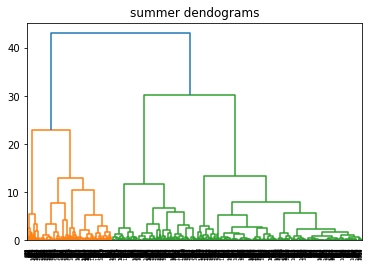

In [25]:
plt.title("summer dendograms")
dend = shc.dendrogram(shc.linkage(summer_scaled,method='ward'))

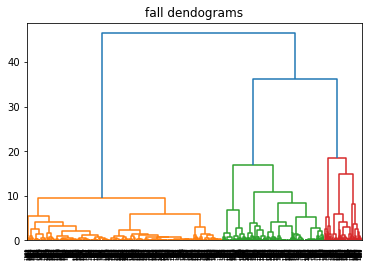

In [26]:
plt.title("fall dendograms")
dend = shc.dendrogram(shc.linkage(fall_scaled,method='ward'))

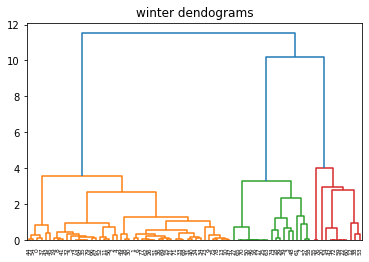

In [27]:
plt.title("winter dendograms")
dend = shc.dendrogram(shc.linkage(winter_scaled,method='ward'))

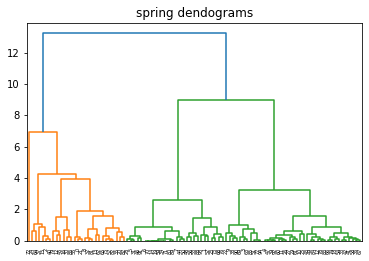

In [28]:
plt.title("spring dendograms")
dend = shc.dendrogram(shc.linkage(spring_scaled,method='ward'))

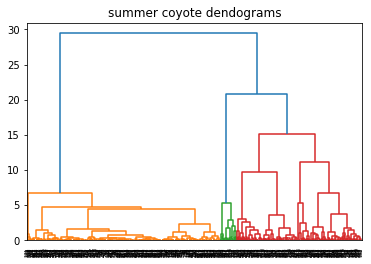

In [29]:
plt.title("summer coyote dendograms")
dend = shc.dendrogram(shc.linkage(coyo_summer_scaled,method='ward'))

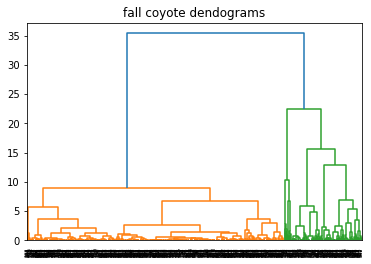

In [30]:
plt.title("fall coyote dendograms")
dend = shc.dendrogram(shc.linkage(coyo_fall_scaled,method='ward'))

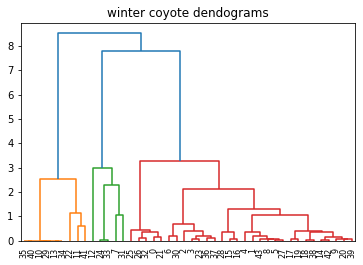

In [31]:
plt.title("winter coyote dendograms")
dend = shc.dendrogram(shc.linkage(coyo_winter_scaled,method='ward'))

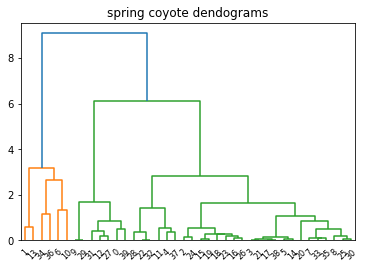

In [32]:
plt.title("spring coyote dendograms")
dend = shc.dendrogram(shc.linkage(coyo_spring_scaled,method='ward'))

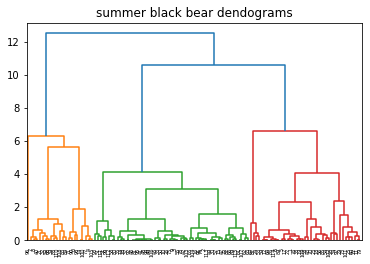

In [33]:
plt.title("summer black bear dendograms")
dend = shc.dendrogram(shc.linkage(b_summer_scaled,method='ward'))

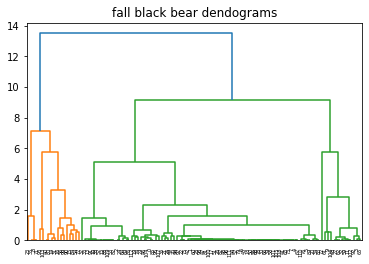

In [34]:
plt.title("fall black bear dendograms")
dend = shc.dendrogram(shc.linkage(b_fall_scaled,method='ward'))

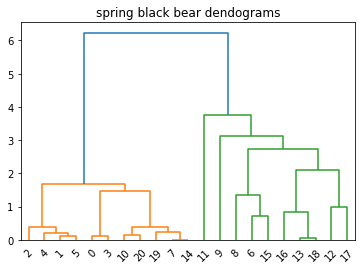

In [35]:
plt.title("spring black bear dendograms")
dend = shc.dendrogram(shc.linkage(b_spring_scaled,method='ward'))

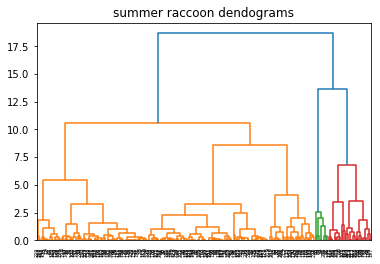

In [36]:
plt.title("summer raccoon dendograms")
dend = shc.dendrogram(shc.linkage(r_summer_scaled,method='ward'))

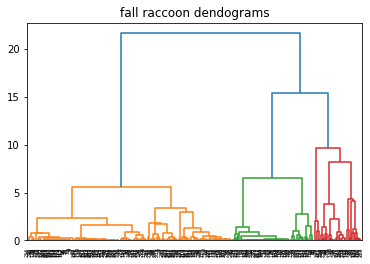

In [37]:
plt.title("fall raccoon dendograms")
dend = shc.dendrogram(shc.linkage(r_fall_scaled,method='ward'))

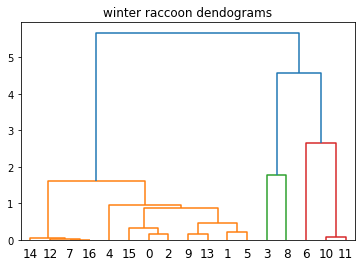

In [38]:
plt.title("winter raccoon dendograms")
dend = shc.dendrogram(shc.linkage(r_winter_scaled,method='ward'))

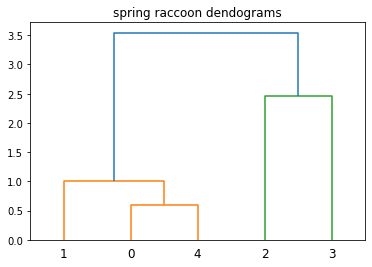

In [39]:
plt.title("spring raccoon dendograms")
dend = shc.dendrogram(shc.linkage(r_spring_scaled,method='ward'))

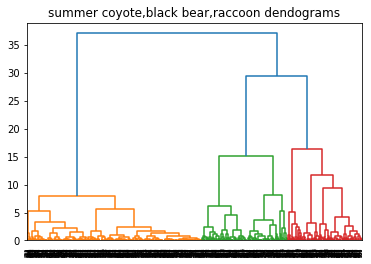

In [40]:
plt.title("summer coyote,black bear,raccoon dendograms")
dend = shc.dendrogram(shc.linkage(cbr_summer_scaled,method='ward'))

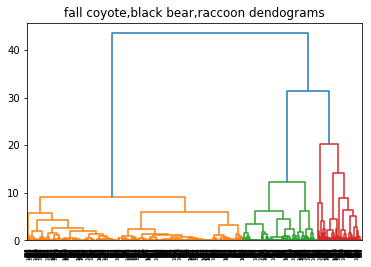

In [41]:
plt.title("fall coyote,black bear,raccoon dendograms")
dend = shc.dendrogram(shc.linkage(cbr_fall_scaled,method='ward'))

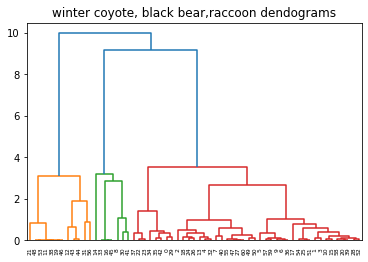

In [42]:
plt.title("winter coyote, black bear,raccoon dendograms")
dend = shc.dendrogram(shc.linkage(cbr_winter_scaled,method='ward'))

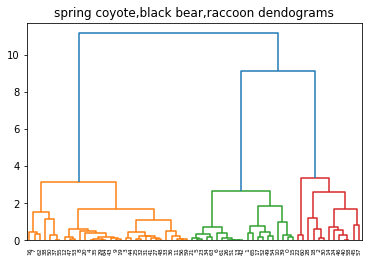

In [43]:
plt.title("spring coyote,black bear,raccoon dendograms")
dend = shc.dendrogram(shc.linkage(cbr_spring_scaled,method='ward'))

In [ ]:
#cluster numbers are determined using the dendrogram, can be adjusted based on the graph

In [44]:
summer_cluster = AgglomerativeClustering(n_clusters =5, affinity='euclidean',linkage='ward')
summer_cluster.fit_predict(summer_scaled)

array([2, 1, 1, ..., 0, 1, 2])

In [45]:
fall_cluster = AgglomerativeClustering(n_clusters =3, affinity='euclidean',linkage='ward')
fall_cluster.fit_predict(fall_scaled)

array([2, 1, 1, ..., 1, 2, 1])

In [46]:
winter_cluster = AgglomerativeClustering(n_clusters =3, affinity='euclidean',linkage='ward')
winter_cluster.fit_predict(winter_scaled)

array([1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 1])

In [47]:
spring_cluster = AgglomerativeClustering(n_clusters =4, affinity='euclidean',linkage='ward')
spring_cluster.fit_predict(spring_scaled)

array([0, 2, 0, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 0,
       1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 1, 0, 1, 0, 0,
       1, 1, 2, 1, 2, 2, 3, 2, 1, 0, 2, 1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0,
       2, 2, 1, 2, 1, 2, 1])

In [48]:
coyo_summer_cluster = AgglomerativeClustering(n_clusters = 4, affinity='euclidean',linkage='ward')
coyo_summer_cluster.fit_predict(coyo_summer_scaled)

array([1, 3, 3, 0, 1, 0, 2, 3, 3, 0, 3, 0, 0, 3, 0, 0, 1, 1, 3, 3, 0, 1,
       3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 0, 3, 3, 1, 3, 3, 1, 3, 3, 0,
       3, 0, 0, 2, 3, 0, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 3,
       3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 0, 0, 0, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 1, 2, 1, 3,
       0, 3, 1, 0, 3, 2, 3, 3, 3, 1, 0, 0, 3, 3, 1, 3, 3, 1, 1, 3, 3, 2,
       3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 2, 0, 1, 1, 1, 1, 0, 3, 3, 3, 1,
       0, 0, 1, 3, 3, 1, 3, 0, 0, 3, 1, 3, 1, 2, 3, 3, 3, 3, 0, 0, 3, 3,
       0, 1, 3, 1, 1, 3, 3, 3, 0, 1, 0, 0, 0, 0, 3, 3, 1, 0, 3, 3, 3, 3,
       0, 0, 3, 3, 2, 3, 3, 0, 3, 3, 1, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 1, 3, 3, 3, 1, 0, 1, 0, 0, 0, 0, 2, 3, 3, 3, 1, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 0, 1, 3, 3,
       0, 3, 3, 1, 3, 3, 3, 1, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 0, 3, 2, 3, 3, 3, 3, 3, 1, 3, 1,

In [49]:
coyo_fall_cluster = AgglomerativeClustering(n_clusters =8, affinity='euclidean',linkage='ward')
coyo_fall_cluster.fit_predict(coyo_fall_scaled)

array([2, 0, 2, 0, 0, 6, 3, 0, 0, 2, 0, 2, 2, 0, 3, 2, 5, 0, 0, 0, 2, 7,
       0, 3, 0, 2, 0, 6, 2, 0, 3, 0, 2, 7, 2, 2, 3, 3, 0, 0, 2, 2, 2, 3,
       0, 6, 4, 0, 2, 0, 0, 6, 0, 6, 0, 0, 0, 0, 4, 0, 0, 3, 0, 3, 0, 2,
       6, 3, 0, 0, 0, 0, 1, 0, 5, 0, 2, 2, 0, 0, 0, 0, 2, 2, 7, 0, 2, 0,
       6, 0, 2, 4, 3, 3, 0, 5, 0, 0, 0, 3, 6, 0, 2, 3, 2, 2, 7, 0, 0, 4,
       7, 2, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 4,
       0, 2, 2, 0, 3, 2, 0, 2, 2, 0, 0, 0, 2, 0, 3, 2, 4, 0, 0, 2, 2, 0,
       0, 0, 2, 0, 3, 0, 2, 0, 0, 6, 0, 2, 2, 0, 0, 6, 0, 0, 2, 0, 0, 4,
       0, 0, 2, 3, 4, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 3, 6, 2, 2,
       0, 7, 0, 0, 0, 0, 2, 0, 3, 0, 0, 6, 3, 3, 0, 0, 2, 0, 0, 0, 6, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 7, 3, 0, 2, 0, 0, 0, 0, 0, 2, 0, 3, 3,
       0, 0, 2, 0, 0, 7, 0, 2, 3, 0, 0, 6, 0, 0, 0, 7, 0, 6, 0, 0, 0, 7,
       7, 0, 6, 0, 2, 0, 2, 2, 0, 3, 2, 1, 0, 4, 6, 2, 2, 2, 0, 0, 0, 0,
       2, 7, 3, 2, 3, 2, 2, 0, 2, 6, 0, 0, 0, 2, 0,

In [50]:
coyo_winter_cluster = AgglomerativeClustering(n_clusters =3, affinity='euclidean',linkage='ward')
coyo_winter_cluster.fit_predict(coyo_winter_scaled)

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [51]:
coyo_spring_cluster = AgglomerativeClustering(n_clusters =6, affinity='euclidean',linkage='ward')
coyo_spring_cluster.fit_predict(coyo_spring_scaled)

array([0, 3, 1, 1, 4, 1, 2, 1, 1, 0, 2, 4, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 1, 5, 1, 5, 4, 1, 0])

In [52]:
b_summer_cluster = AgglomerativeClustering(n_clusters =6, affinity='euclidean',linkage='ward')
b_summer_cluster.fit_predict(b_summer_scaled)

array([2, 1, 0, 0, 2, 1, 1, 5, 5, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 5,
       1, 1, 3, 1, 0, 1, 0, 1, 0, 0, 5, 0, 1, 0, 1, 0, 1, 5, 5, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 3, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 3, 5, 0, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 5, 5, 1, 1, 3,
       5, 1, 2, 0, 0, 0, 0, 0, 4, 1, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 5, 1,
       5, 0, 0, 0, 1, 0])

In [53]:
b_fall_cluster = AgglomerativeClustering(n_clusters =4, affinity='euclidean',linkage='ward')
b_fall_cluster.fit_predict(b_fall_scaled)

array([2, 2, 2, 0, 2, 2, 2, 2, 3, 0, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2,
       2, 2, 2])

In [54]:
b_spring_cluster = AgglomerativeClustering(n_clusters =3, affinity='euclidean',linkage='ward')
b_spring_cluster.fit_predict(b_spring_scaled)

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [55]:
r_summer_cluster = AgglomerativeClustering(n_clusters =7, affinity='euclidean',linkage='ward')
r_summer_cluster.fit_predict(r_summer_scaled)

array([0, 5, 4, 3, 6, 4, 2, 0, 3, 3, 3, 4, 6, 4, 4, 0, 3, 3, 4, 3, 4, 3,
       6, 3, 4, 0, 4, 5, 3, 3, 6, 4, 5, 3, 6, 3, 3, 4, 4, 3, 3, 5, 4, 4,
       1, 4, 4, 4, 4, 5, 4, 3, 1, 3, 0, 4, 5, 4, 0, 6, 4, 4, 3, 6, 0, 4,
       2, 0, 0, 5, 3, 0, 3, 4, 3, 4, 3, 3, 3, 1, 4, 4, 4, 0, 2, 4, 5, 3,
       4, 4, 0, 0, 0, 3, 1, 4, 3, 3, 4, 4, 3, 2, 3, 4, 2, 4, 4, 0, 2, 4,
       4, 3, 4, 0, 1, 3, 3, 1, 1, 0, 6, 4, 4, 3, 2, 4, 4, 4, 1, 4, 3, 3,
       4, 0, 6, 0, 4, 4, 4, 1, 2, 6, 0, 0, 4, 4, 4, 3, 3, 3, 3, 4, 3, 4,
       4, 4, 1, 3, 3, 3, 4, 2, 3, 4, 6, 4, 1, 3, 4, 1, 0, 2, 4, 0, 0, 3,
       4, 4, 0, 6, 3, 4, 3, 4, 0, 3, 3, 4, 6, 4, 3, 4, 3, 2, 3, 4, 4, 1,
       6, 4, 1, 0, 3, 5, 0, 4, 3, 3, 1, 4, 4, 3, 4, 0, 1, 6, 4, 4, 4, 1,
       0, 6, 4, 1, 3, 2, 4, 4, 0, 6, 0, 4])

In [56]:
r_fall_cluster = AgglomerativeClustering(n_clusters =7, affinity='euclidean',linkage='ward')
r_fall_cluster.fit_predict(r_fall_scaled)

array([6, 2, 6, 2, 6, 2, 6, 6, 1, 6, 6, 6, 2, 4, 5, 6, 2, 5, 6, 5, 5, 1,
       6, 2, 4, 4, 2, 6, 6, 3, 2, 1, 6, 6, 5, 5, 2, 2, 6, 6, 3, 6, 6, 5,
       5, 6, 1, 5, 1, 1, 6, 2, 1, 5, 1, 6, 4, 5, 6, 6, 5, 2, 2, 6, 2, 2,
       0, 0, 5, 2, 2, 5, 5, 4, 4, 6, 4, 1, 5, 1, 4, 6, 6, 6, 2, 2, 6, 2,
       0, 0, 6, 2, 2, 2, 6, 2, 5, 2, 6, 5, 6, 4, 5, 2, 6, 5, 2, 6, 4, 6,
       6, 3, 6, 5, 5, 2, 4, 6, 2, 6, 2, 5, 2, 5, 6, 4, 2, 5, 6, 6, 0, 2,
       5, 2, 6, 6, 5, 6, 6, 0, 1, 5, 5, 0, 2, 6, 6, 6, 1, 6, 5, 2, 2, 6,
       5, 5, 3, 6, 6, 1, 6, 6, 6, 5, 2, 6, 6, 5, 5, 5, 2, 6, 2, 2, 2, 4,
       6, 0, 6, 6, 2, 2, 2, 6, 2, 4, 5, 2, 5, 6, 6, 1, 6, 6, 0, 1, 2, 4,
       2, 6, 6, 1, 5, 2, 6, 2, 2, 2, 6, 2, 2, 5, 1, 2, 6, 5, 6, 2, 0, 6,
       4, 6, 6, 5, 1, 2, 2, 4, 1, 5, 0, 2, 6, 2, 6, 6, 2, 5, 2, 6, 2, 6,
       6, 6, 6, 6, 6, 3, 6, 2, 5, 2, 6, 2, 6, 1, 6, 5, 1, 6, 0, 6, 2, 6,
       2, 4, 6])

In [57]:
r_winter_cluster = AgglomerativeClustering(n_clusters =3, affinity='euclidean',linkage='ward')
r_winter_cluster.fit_predict(r_winter_scaled)

array([1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1])

In [58]:
r_spring_cluster = AgglomerativeClustering(n_clusters =3, affinity='euclidean',linkage='ward')
r_spring_cluster.fit_predict(r_spring_scaled)

array([0, 0, 2, 1, 0])

In [59]:
cbr_summer_cluster = AgglomerativeClustering(n_clusters =5, affinity='euclidean',linkage='ward')
cbr_summer_cluster.fit_predict(cbr_summer_scaled)

array([4, 1, 1, 0, 2, 4, 0, 0, 3, 3, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0,
       2, 4, 2, 4, 2, 0, 2, 2, 1, 1, 0, 0, 4, 1, 1, 0, 1, 1, 4, 1, 0, 4,
       1, 1, 1, 1, 2, 1, 1, 2, 4, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 1, 1, 4, 1, 1, 1, 0, 1, 0, 0, 4, 3, 1, 4, 0, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 4, 0, 2, 1, 1,
       1, 2, 1, 1, 0, 1, 0, 4, 2, 1, 4, 1, 1, 0, 2, 1, 2, 1, 1, 1, 3, 1,
       1, 3, 1, 1, 1, 1, 0, 1, 1, 2, 4, 1, 1, 1, 2, 0, 0, 0, 2, 3, 1, 3,
       1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 4, 3, 2, 2,
       1, 1, 1, 1, 0, 3, 1, 4, 4, 1, 1, 3, 1, 1, 1, 0, 1, 1, 4, 2, 0, 4,
       1, 4, 0, 1, 1, 2, 1, 1, 1, 1, 3, 2, 4, 1, 1, 1, 3, 1, 1, 2, 1, 1,
       0, 1, 1, 0, 1, 1, 4, 4, 2, 1, 1, 1, 1, 3, 3, 0, 1, 1, 0, 2, 4, 4,
       4, 0, 4, 1, 2, 1, 1, 1, 4, 0, 0, 0, 4, 2, 1, 2, 1, 1, 1, 4, 0, 1,
       0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 4, 1, 4, 3, 1, 1, 1, 1, 3, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 4,

In [60]:
cbr_fall_cluster = AgglomerativeClustering(n_clusters =4, affinity='euclidean',linkage='ward')
cbr_fall_cluster.fit_predict(cbr_fall_scaled)

array([1, 1, 1, ..., 1, 1, 1])

In [61]:
cbr_winter_cluster = AgglomerativeClustering(n_clusters =3, affinity='euclidean',linkage='ward')
cbr_winter_cluster.fit_predict(cbr_winter_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1,
       1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [62]:
cbr_spring_cluster = AgglomerativeClustering(n_clusters =3, affinity='euclidean',linkage='ward')
cbr_spring_cluster.fit_predict(cbr_spring_scaled)

array([2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 2, 0, 1, 1, 2,
       0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1,
       1, 0, 0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 2])

In [63]:
def clusterSize(clus):
    if(len(clus)<3):
        plt.plot(clus[:,0],clus[:,1],'.')
        print("# of data points:",len(clus))
        print('This cluster does not have enought data points to make a convex hull')
        print('------------------------------------------------------')
        
    else:
        hull = ConvexHull(clus)
        plt.plot(clus[:,0],clus[:,1],'.')
        for simplex in hull.simplices:
            plt.plot(clus[simplex,0],clus[simplex,1],'k-')
        plt.plot(clus[hull.vertices[0],0],clus[hull.vertices[0],1],'ro')
        print("# of data points:",len(clus))
        print("cluster perimeter(hull.area):",hull.area)
        print("cluster area(hull.volume):",hull.volume)
        print('------------------------------------------------------')

Text(0.5, 1.0, 'Winter')

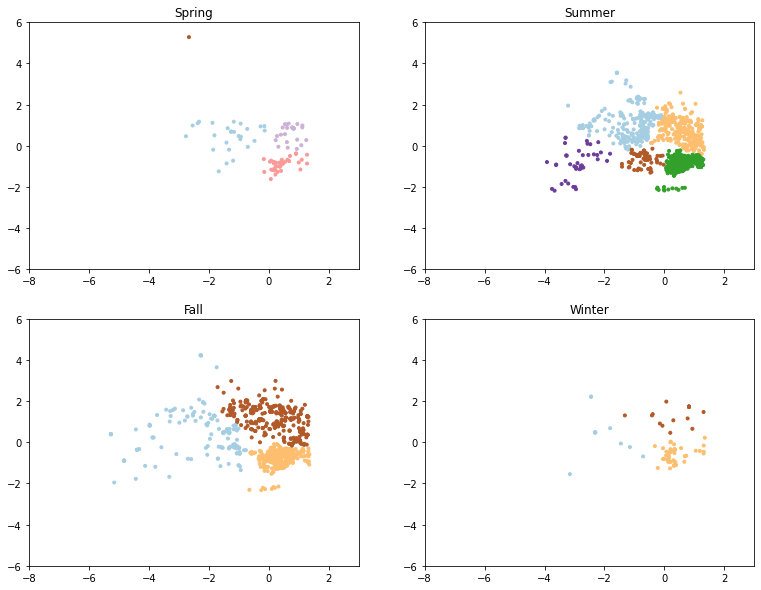

In [64]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-8,3)
c_ylim=(-6,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(spring_scaled[:,0],spring_scaled[:,1],c=spring_cluster.labels_,cmap='Paired',marker='.')
axs[0,0].set_title('Spring')
axs[0,1].scatter(summer_scaled[:,0],summer_scaled[:,1],c=summer_cluster.labels_,cmap='Paired',marker='.')
axs[0,1].set_title('Summer')
axs[1,0].scatter(fall_scaled[:,0],fall_scaled[:,1],c=fall_cluster.labels_,cmap='Paired',marker='.')
axs[1,0].set_title('Fall')
axs[1,1].scatter(winter_scaled[:,0],winter_scaled[:,1],c=winter_cluster.labels_,cmap='Paired',marker='.')
axs[1,1].set_title('Winter')


In [65]:
spring_arr = spring_cluster.labels_
summer_arr = summer_cluster.labels_
fall_arr = fall_cluster.labels_
winter_arr = winter_cluster.labels_

In [66]:
spring_clus = [spring_scaled[spring_arr==i] for i in range(spring_cluster.n_clusters)] #4
summer_clus = [summer_scaled[summer_arr==i] for i in range(summer_cluster.n_clusters)] #5
fall_clus = [fall_scaled[fall_arr==i] for i in range(fall_cluster.n_clusters)] #3
winter_clus = [winter_scaled[winter_arr==i] for i in range(winter_cluster.n_clusters)] #3

# of data points: 27
cluster perimeter(hull.area): 7.802430803913911
cluster area(hull.volume): 3.74513432883771
------------------------------------------------------
# of data points: 39
cluster perimeter(hull.area): 4.400282547593962
cluster area(hull.volume): 1.2192149939386931
------------------------------------------------------
# of data points: 28
cluster perimeter(hull.area): 3.645110754601063
cluster area(hull.volume): 0.9466463458390615
------------------------------------------------------
# of data points: 1
This cluster does not have enought data points to make a convex hull
------------------------------------------------------


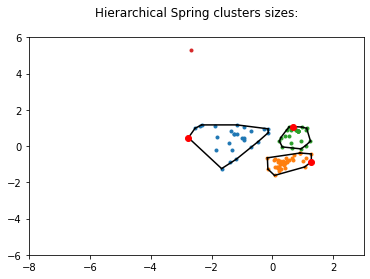

In [90]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('Hierarchical Spring clusters sizes:\n')
for i in spring_clus:
    clusterSize(i)

# of data points: 238
cluster perimeter(hull.area): 10.051365181608022
cluster area(hull.volume): 6.9369819879133745
------------------------------------------------------
# of data points: 484
cluster perimeter(hull.area): 5.679632689337183
cluster area(hull.volume): 2.0443196781361115
------------------------------------------------------
# of data points: 285
cluster perimeter(hull.area): 7.791205970958071
cluster area(hull.volume): 3.736856673839457
------------------------------------------------------
# of data points: 44
cluster perimeter(hull.area): 7.367412670714831
cluster area(hull.volume): 3.627239246505465
------------------------------------------------------
# of data points: 63
cluster perimeter(hull.area): 4.090008191153346
cluster area(hull.volume): 1.1913191578309439
------------------------------------------------------


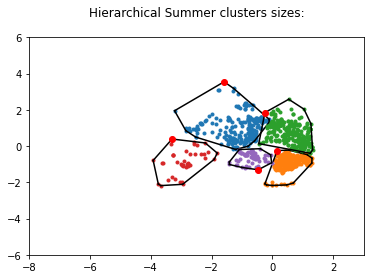

In [91]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('Hierarchical Summer clusters sizes:\n')
for i in summer_clus:
    clusterSize(i)

# of data points: 144
cluster perimeter(hull.area): 17.395090917517663
cluster area(hull.volume): 17.839179229121566
------------------------------------------------------
# of data points: 752
cluster perimeter(hull.area): 7.138240264349712
cluster area(hull.volume): 3.379505939220865
------------------------------------------------------
# of data points: 393
cluster perimeter(hull.area): 10.217136918032848
cluster area(hull.volume): 7.144036081713891
------------------------------------------------------


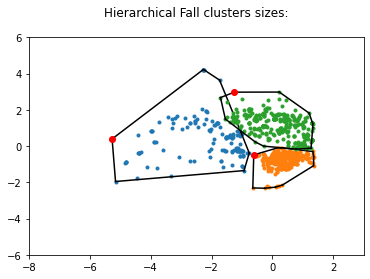

In [93]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('Hierarchical Fall clusters sizes:\n')
for i in fall_clus:
    clusterSize(i)

# of data points: 12
cluster perimeter(hull.area): 9.795839793354936
cluster area(hull.volume): 4.2889456404744575
------------------------------------------------------
# of data points: 49
cluster perimeter(hull.area): 5.3018856230337885
cluster area(hull.volume): 1.710338918436841
------------------------------------------------------
# of data points: 19
cluster perimeter(hull.area): 6.2769284525427596
cluster area(hull.volume): 2.301686143792826
------------------------------------------------------


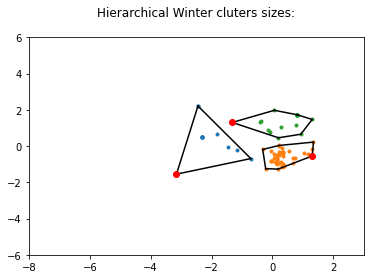

In [94]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('Hierarchical Winter cluters sizes:\n')
for i in winter_clus:
    clusterSize(i)

Text(0.5, 1.0, 'coyote Winter')

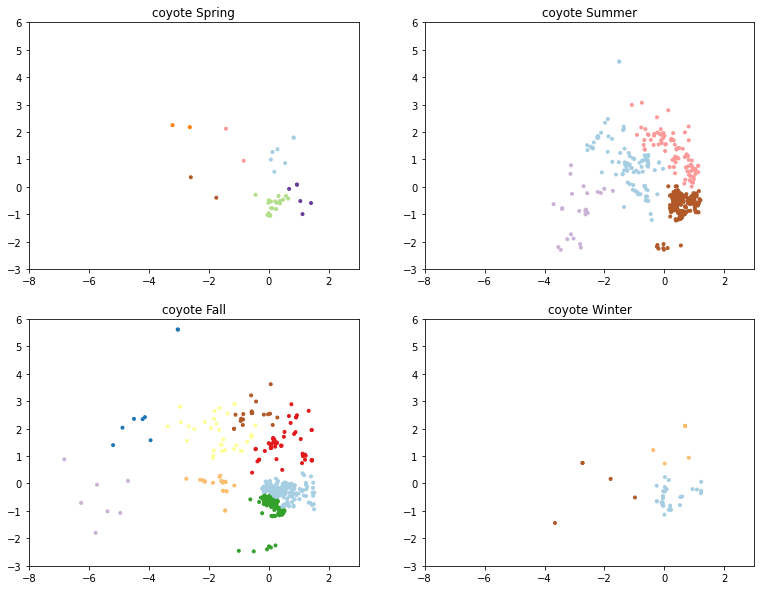

In [71]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-8,3)
c_ylim=(-3,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(coyo_spring_scaled[:,0],coyo_spring_scaled[:,1],c=coyo_spring_cluster.labels_,cmap='Paired',marker='.')
axs[0,0].set_title('coyote Spring')
axs[0,1].scatter(coyo_summer_scaled[:,0],coyo_summer_scaled[:,1],c=coyo_summer_cluster.labels_,cmap='Paired',marker='.')
axs[0,1].set_title('coyote Summer')
axs[1,0].scatter(coyo_fall_scaled[:,0],coyo_fall_scaled[:,1],c=coyo_fall_cluster.labels_,cmap='Paired',marker='.')
axs[1,0].set_title('coyote Fall')
axs[1,1].scatter(coyo_winter_scaled[:,0],coyo_winter_scaled[:,1],c=coyo_winter_cluster.labels_,cmap='Paired',marker='.')
axs[1,1].set_title('coyote Winter')

In [72]:
coyo_spring_arr = coyo_spring_cluster.labels_
coyo_summer_arr = coyo_summer_cluster.labels_
coyo_fall_arr = coyo_fall_cluster.labels_
coyo_winter_arr = coyo_winter_cluster.labels_

coyo_spring_clus = [coyo_spring_scaled[coyo_spring_arr==i] for i in range(coyo_spring_cluster.n_clusters)]#6
coyo_summer_clus = [coyo_summer_scaled[coyo_summer_arr==i] for i in range(coyo_summer_cluster.n_clusters)] #4
coyo_fall_clus = [coyo_fall_scaled[coyo_fall_arr==i] for i in range(coyo_fall_cluster.n_clusters)] #8
coyo_winter_clus = [coyo_winter_scaled[coyo_winter_arr==i] for i in range(coyo_winter_cluster.n_clusters)] #3

# of data points: 7
cluster perimeter(hull.area): 3.071769213172831
cluster area(hull.volume): 0.42330934827498884
------------------------------------------------------
# of data points: 21
cluster perimeter(hull.area): 2.9363697166545095
cluster area(hull.volume): 0.4587456046518871
------------------------------------------------------
# of data points: 2
This cluster does not have enought data points to make a convex hull
------------------------------------------------------
# of data points: 2
This cluster does not have enought data points to make a convex hull
------------------------------------------------------
# of data points: 6
cluster perimeter(hull.area): 2.639027064798543
cluster area(hull.volume): 0.34517043200555103
------------------------------------------------------
# of data points: 2
This cluster does not have enought data points to make a convex hull
------------------------------------------------------


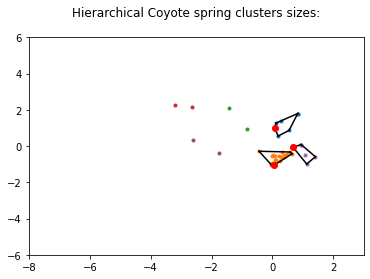

In [95]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('Hierarchical Coyote spring clusters sizes:\n')
for i in coyo_spring_clus:
    clusterSize(i)

# of data points: 100
cluster perimeter(hull.area): 12.930344501010838
cluster area(hull.volume): 7.690688021571475
------------------------------------------------------
# of data points: 94
cluster perimeter(hull.area): 8.212788238523467
cluster area(hull.volume): 3.869665227627359
------------------------------------------------------
# of data points: 26
cluster perimeter(hull.area): 7.908717016886951
cluster area(hull.volume): 3.6641049626249234
------------------------------------------------------
# of data points: 300
cluster perimeter(hull.area): 6.250437361982805
cluster area(hull.volume): 2.2446211820768682
------------------------------------------------------


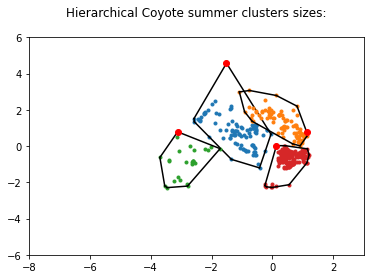

In [96]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('Hierarchical Coyote summer clusters sizes:\n')
for i in coyo_summer_clus:
    clusterSize(i)

# of data points: 350
cluster perimeter(hull.area): 5.108938254066059
cluster area(hull.volume): 1.726915562089539
------------------------------------------------------
# of data points: 8
cluster perimeter(hull.area): 10.1397270452026
cluster area(hull.volume): 2.4838643245902485
------------------------------------------------------
# of data points: 185
cluster perimeter(hull.area): 5.912264559045874
cluster area(hull.volume): 2.2372998927499363
------------------------------------------------------
# of data points: 61
cluster perimeter(hull.area): 7.375486964640234
cluster area(hull.volume): 3.2886049865095806
------------------------------------------------------
# of data points: 23
cluster perimeter(hull.area): 4.426652414302481
cluster area(hull.volume): 0.998066450077074
------------------------------------------------------
# of data points: 7
cluster perimeter(hull.area): 7.429060033519656
cluster area(hull.volume): 2.897819424202531
---------------------------------------

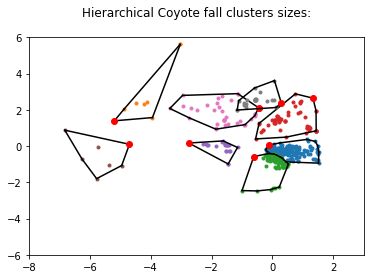

In [97]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('Hierarchical Coyote fall clusters sizes:\n')
for i in coyo_fall_clus:
    clusterSize(i)

Coyote winter clusters sizes:

# of data points: 30
cluster perimeter(hull.area): 4.622496803445878
cluster area(hull.volume): 1.3371974309162928
------------------------------------------------------
# of data points: 9
cluster perimeter(hull.area): 3.9931176974241835
cluster area(hull.volume): 0.9045635577959021
------------------------------------------------------
# of data points: 5
cluster perimeter(hull.area): 7.361631902854968
cluster area(hull.volume): 2.574387951696788
------------------------------------------------------


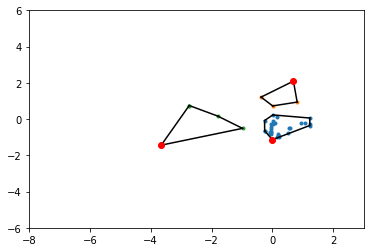

In [76]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('Hierarchical Coyote winter clusters sizes:\n')
for i in coyo_winter_clus:
    clusterSize(i)

Text(0.5, 1.0, 'black bear Winter')

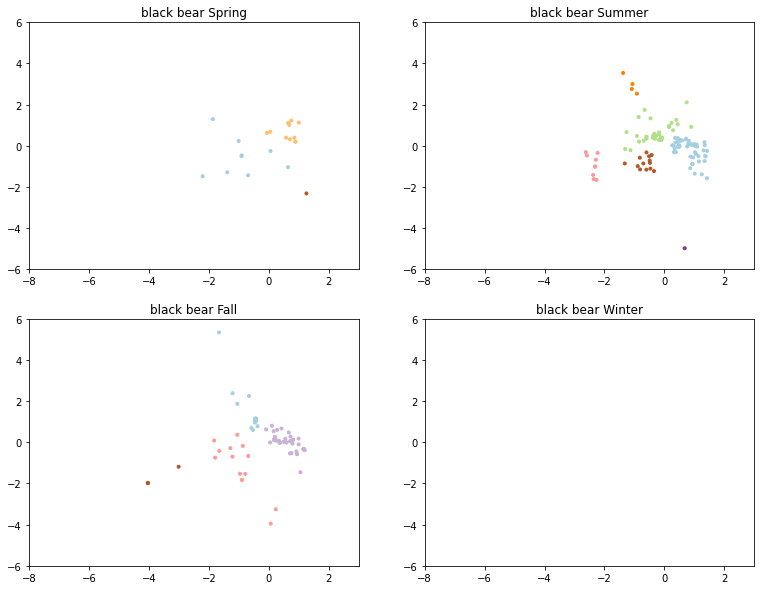

In [98]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-8,3)
c_ylim=(-6,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(b_spring_scaled[:,0],b_spring_scaled[:,1],c=b_spring_cluster.labels_,cmap='Paired',marker='.')
axs[0,0].set_title('black bear Spring')
axs[0,1].scatter(b_summer_scaled[:,0],b_summer_scaled[:,1],c=b_summer_cluster.labels_,cmap='Paired',marker='.')
axs[0,1].set_title('black bear Summer')
axs[1,0].scatter(b_fall_scaled[:,0],b_fall_scaled[:,1],c=b_fall_cluster.labels_,cmap='Paired',marker='.')
axs[1,0].set_title('black bear Fall')
axs[1,1].set_title('black bear Winter')



In [78]:
b_spring_arr = b_spring_cluster.labels_
b_summer_arr = b_summer_cluster.labels_
b_fall_arr = b_fall_cluster.labels_

b_spring_clus = [b_spring_scaled[b_spring_arr==i] for i in range(b_spring_cluster.n_clusters)] 
b_summer_clus = [b_summer_scaled[b_summer_arr == i] for i in range(b_summer_cluster.n_clusters)] 
b_fall_clus = [b_fall_scaled[b_fall_arr==i] for i in range(b_fall_cluster.n_clusters)] 


# of data points: 9
cluster perimeter(hull.area): 9.159057087742326
cluster area(hull.volume): 4.457717324546232
------------------------------------------------------
# of data points: 11
cluster perimeter(hull.area): 3.2437181454383763
cluster area(hull.volume): 0.5753961296638871
------------------------------------------------------
# of data points: 1
This cluster does not have enought data points to make a convex hull
------------------------------------------------------


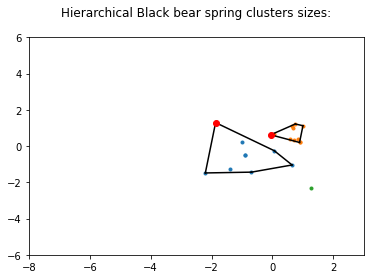

In [99]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('Hierarchical Black bear spring clusters sizes:\n')
for i in b_spring_clus:
    clusterSize(i)

# of data points: 54
cluster perimeter(hull.area): 5.187869939618378
cluster area(hull.volume): 1.4911780776519912
------------------------------------------------------
# of data points: 35
cluster perimeter(hull.area): 7.216622933935917
cluster area(hull.volume): 3.061707380886666
------------------------------------------------------
# of data points: 9
cluster perimeter(hull.area): 3.1415883118535026
cluster area(hull.volume): 0.31576556715735693
------------------------------------------------------
# of data points: 4
cluster perimeter(hull.area): 2.2234865573645184
cluster area(hull.volume): 0.06622878536191126
------------------------------------------------------
# of data points: 1
This cluster does not have enought data points to make a convex hull
------------------------------------------------------
# of data points: 13
cluster perimeter(hull.area): 2.9566194712333376
cluster area(hull.volume): 0.5051337815058289
------------------------------------------------------


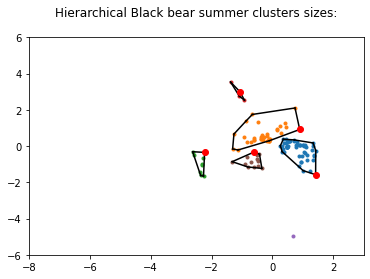

In [100]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('Hierarchical Black bear summer clusters sizes:\n')
for i in b_summer_clus:
    clusterSize(i)

# of data points: 14
cluster perimeter(hull.area): 9.880441667243922
cluster area(hull.volume): 1.4236223639890098
------------------------------------------------------
# of data points: 14
cluster perimeter(hull.area): 9.908210286766636
cluster area(hull.volume): 3.295579754066024
------------------------------------------------------
# of data points: 81
cluster perimeter(hull.area): 5.458484247289348
cluster area(hull.volume): 1.4330820034764447
------------------------------------------------------
# of data points: 4
cluster perimeter(hull.area): 2.6017316606417755
cluster area(hull.volume): 0.005140664609530013
------------------------------------------------------


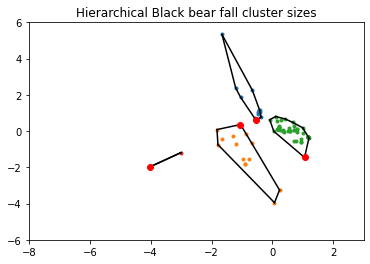

In [101]:
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('Hierarchical Black bear fall cluster sizes')
for i in b_fall_clus:
    clusterSize(i)

Text(0.5, 1.0, 'raccoon Winter')

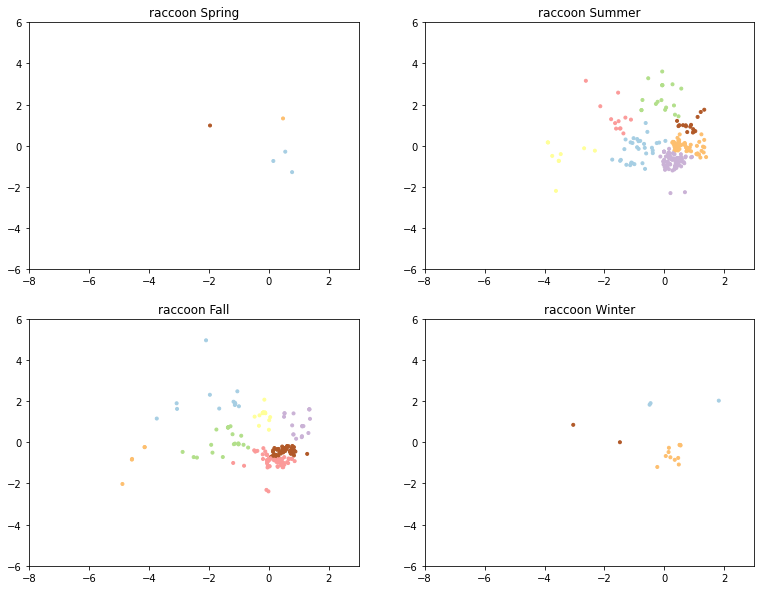

In [102]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-8,3)
c_ylim=(-6,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(r_spring_scaled[:,0],r_spring_scaled[:,1],c=r_spring_cluster.labels_,cmap='Paired',marker='.')
axs[0,0].set_title('raccoon Spring')
axs[0,1].scatter(r_summer_scaled[:,0],r_summer_scaled[:,1],c=r_summer_cluster.labels_,cmap='Paired',marker='.')
axs[0,1].set_title('raccoon Summer')
axs[1,0].scatter(r_fall_scaled[:,0],r_fall_scaled[:,1],c=r_fall_cluster.labels_,cmap='Paired',marker='.')
axs[1,0].set_title('raccoon Fall')
axs[1,1].scatter(r_winter_scaled[:,0],r_winter_scaled[:,1],c=r_winter_cluster.labels_,cmap='Paired',marker='.')
axs[1,1].set_title('raccoon Winter')



In [83]:
r_spring_arr = r_spring_cluster.labels_
r_summer_arr = r_summer_cluster.labels_
r_fall_arr = r_fall_cluster.labels_
r_winter_arr = r_winter_cluster.labels_

r_spring_clus = [r_spring_scaled[r_spring_arr==i] for i in range(r_spring_cluster.n_clusters)] #3
r_summer_clus = [r_summer_scaled[r_summer_arr == i] for i in range(r_summer_cluster.n_clusters)] #7
r_fall_clus = [r_fall_scaled[r_fall_arr==i] for i in range(r_fall_cluster.n_clusters)] #7
r_winter_clus = [r_winter_scaled[r_winter_arr==i] for i in range(r_winter_cluster.n_clusters)] #3

# of data points: 3
cluster perimeter(hull.area): 2.450148557630865
cluster area(hull.volume): 0.24936695490098573
------------------------------------------------------
# of data points: 1
This cluster does not have enought data points to make a convex hull
------------------------------------------------------
# of data points: 1
This cluster does not have enought data points to make a convex hull
------------------------------------------------------


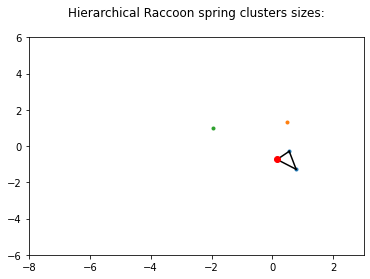

In [103]:
#raccoon spring clusters:3

plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('Hierarchical Raccoon spring clusters sizes:\n')
for i in r_spring_clus:
    clusterSize(i)

# of data points: 32
cluster perimeter(hull.area): 5.914365672694769
cluster area(hull.volume): 2.147581012101611
------------------------------------------------------
# of data points: 18
cluster perimeter(hull.area): 5.8037405276680145
cluster area(hull.volume): 2.0840762880959876
------------------------------------------------------
# of data points: 12
cluster perimeter(hull.area): 6.186753698604302
cluster area(hull.volume): 1.552390454074593
------------------------------------------------------
# of data points: 60
cluster perimeter(hull.area): 3.8352918113821746
cluster area(hull.volume): 0.9813258238257804
------------------------------------------------------
# of data points: 84
cluster perimeter(hull.area): 5.368335823561
cluster area(hull.volume): 1.5553635069917016
------------------------------------------------------
# of data points: 9
cluster perimeter(hull.area): 6.344650848672758
cluster area(hull.volume): 1.817273939989778
----------------------------------------

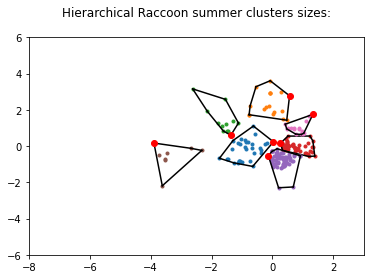

In [104]:
#raccoon summer clusters:7
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('Hierarchical Raccoon summer clusters sizes:\n')
for i in r_summer_clus:
    clusterSize(i)

# of data points: 12
cluster perimeter(hull.area): 10.361518779439407
cluster area(hull.volume): 5.031589032966824
------------------------------------------------------
# of data points: 21
cluster perimeter(hull.area): 5.6466589292763105
cluster area(hull.volume): 1.9559571369007256
------------------------------------------------------
# of data points: 69
cluster perimeter(hull.area): 6.005540366175722
cluster area(hull.volume): 2.2486275344728024
------------------------------------------------------
# of data points: 5
cluster perimeter(hull.area): 3.9078130700632707
cluster area(hull.volume): 0.16490261437025322
------------------------------------------------------
# of data points: 18
cluster perimeter(hull.area): 3.8158905406652193
cluster area(hull.volume): 0.8594273939899061
------------------------------------------------------
# of data points: 46
cluster perimeter(hull.area): 3.2216084152666364
cluster area(hull.volume): 0.4375281594378606
-------------------------------

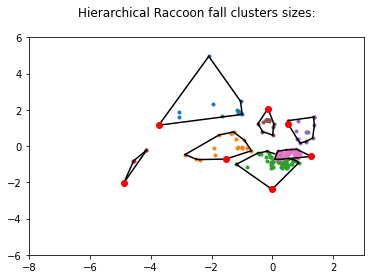

In [105]:
#Raccoon fall clusters:7
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('Hierarchical Raccoon fall clusters sizes:\n')
for i in r_fall_clus:
    clusterSize(i)

# of data points: 3
cluster perimeter(hull.area): 4.676454674710731
cluster area(hull.volume): 0.08190232431477736
------------------------------------------------------
# of data points: 12
cluster perimeter(hull.area): 3.093623163689356
cluster area(hull.volume): 0.494567054972967
------------------------------------------------------
# of data points: 2
This cluster does not have enought data points to make a convex hull
------------------------------------------------------


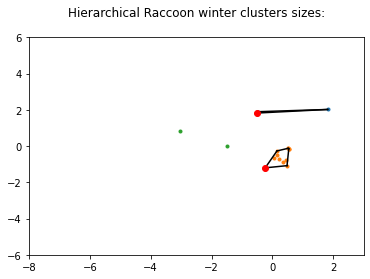

In [106]:
#raccoon winter clusters:3
plt.xlim(-8,3)
plt.ylim(-6,6)
plt.title('Hierarchical Raccoon winter clusters sizes:\n')
for i in r_winter_clus:
    clusterSize(i)

Text(0.5, 1.0, 'coyote, black bear, raccoon Winter')

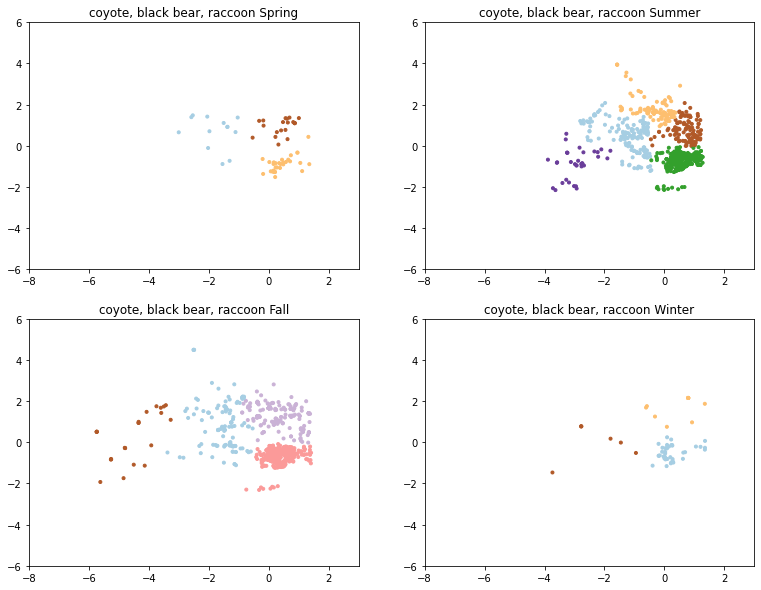

In [107]:
fig,axs = plt.subplots(2,2,figsize=(13,10))
c_xlim=(-8,3)
c_ylim=(-6,6)
plt.setp(axs,xlim=c_xlim,ylim=c_ylim)
axs[0,0].scatter(cbr_spring_scaled[:,0],cbr_spring_scaled[:,1],c=cbr_spring_cluster.labels_,cmap='Paired',marker='.')
axs[0,0].set_title('coyote, black bear, raccoon Spring')
axs[0,1].scatter(cbr_summer_scaled[:,0],cbr_summer_scaled[:,1],c=cbr_summer_cluster.labels_,cmap='Paired',marker='.')
axs[0,1].set_title('coyote, black bear, raccoon Summer')
axs[1,0].scatter(cbr_fall_scaled[:,0],cbr_fall_scaled[:,1],c=cbr_fall_cluster.labels_,cmap='Paired',marker='.')
axs[1,0].set_title('coyote, black bear, raccoon Fall')
axs[1,1].scatter(cbr_winter_scaled[:,0],cbr_winter_scaled[:,1],c=cbr_winter_cluster.labels_,cmap='Paired',marker='.')
axs[1,1].set_title('coyote, black bear, raccoon Winter')
